In [203]:
import matplotlib.pyplot as plt
import pyart
import netCDF4
from glob import glob
import os
import numpy as np
import cartopy.crs as ccrs


In [222]:
fpath = '/Volumes/Neely/PestDAR/Indian_Raw_Radar_Data/DLI200215010229.RAWASHA'
fpath = '/Volumes/Neely/PestDAR/Indian_Raw_Radar_Data/DLI191215001229.RAWF1N3'

fpath ='/Volumes/Neely/PestDAR/Indian_Raw_Radar_Data/JPR200115025253.RAWZLNK'

In [223]:
radar=pyart.io.read_sigmet(fpath)
print(radar.longitude)
print(radar.latitude)

{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([75.81861008])}
{'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([26.82056012])}


In [209]:
instrument_name = radar.metadata['instrument_name'].decode('utf-8')
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')
print(time_text)

 2019-12-15 00:12:37Z


In [157]:
fields=radar.fields.keys()
fields

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'differential_phase', 'normalized_coherent_power', 'cross_correlation_ratio', 'radar_echo_classification'])

In [145]:
radar.fields['reflectivity']['units']

'dBZ'

In [220]:
radar.range

{'units': 'meters',
 'standard_name': 'projection_range_coordinate',
 'long_name': 'range_to_measurement_volume',
 'axis': 'radial_range_coordinate',
 'spacing_is_constant': 'true',
 'comment': 'Coordinate variable for range. Range to center of each bin.',
 'data': array([   600.,    900.,   1200.,   1500.,   1800.,   2100.,   2400.,
          2700.,   3000.,   3300.,   3600.,   3900.,   4200.,   4500.,
          4800.,   5100.,   5400.,   5700.,   6000.,   6300.,   6600.,
          6900.,   7200.,   7500.,   7800.,   8100.,   8400.,   8700.,
          9000.,   9300.,   9600.,   9900.,  10200.,  10500.,  10800.,
         11100.,  11400.,  11700.,  12000.,  12300.,  12600.,  12900.,
         13200.,  13500.,  13800.,  14100.,  14400.,  14700.,  15000.,
         15300.,  15600.,  15900.,  16200.,  16500.,  16800.,  17100.,
         17400.,  17700.,  18000.,  18300.,  18600.,  18900.,  19200.,
         19500.,  19800.,  20100.,  20400.,  20700.,  21000.,  21300.,
         21600.,  21900.,

In [100]:
radar.fields['reflectivity']

{'units': 'dBZ',
 'standard_name': 'equivalent_reflectivity_factor',
 'long_name': 'Reflectivity',
 'coordinates': 'elevation azimuth range',
 'data': masked_array(
   data=[[-18.0, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],
   mask=[[False,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],
   fill_value=1e+20,
   dtype=float32),
 '_FillValue': -9999.0}

/Users/rrniii/anaconda3/envs/pestdar/lib/python3.7/site-packages/pyart/io/sigmet.py:131: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


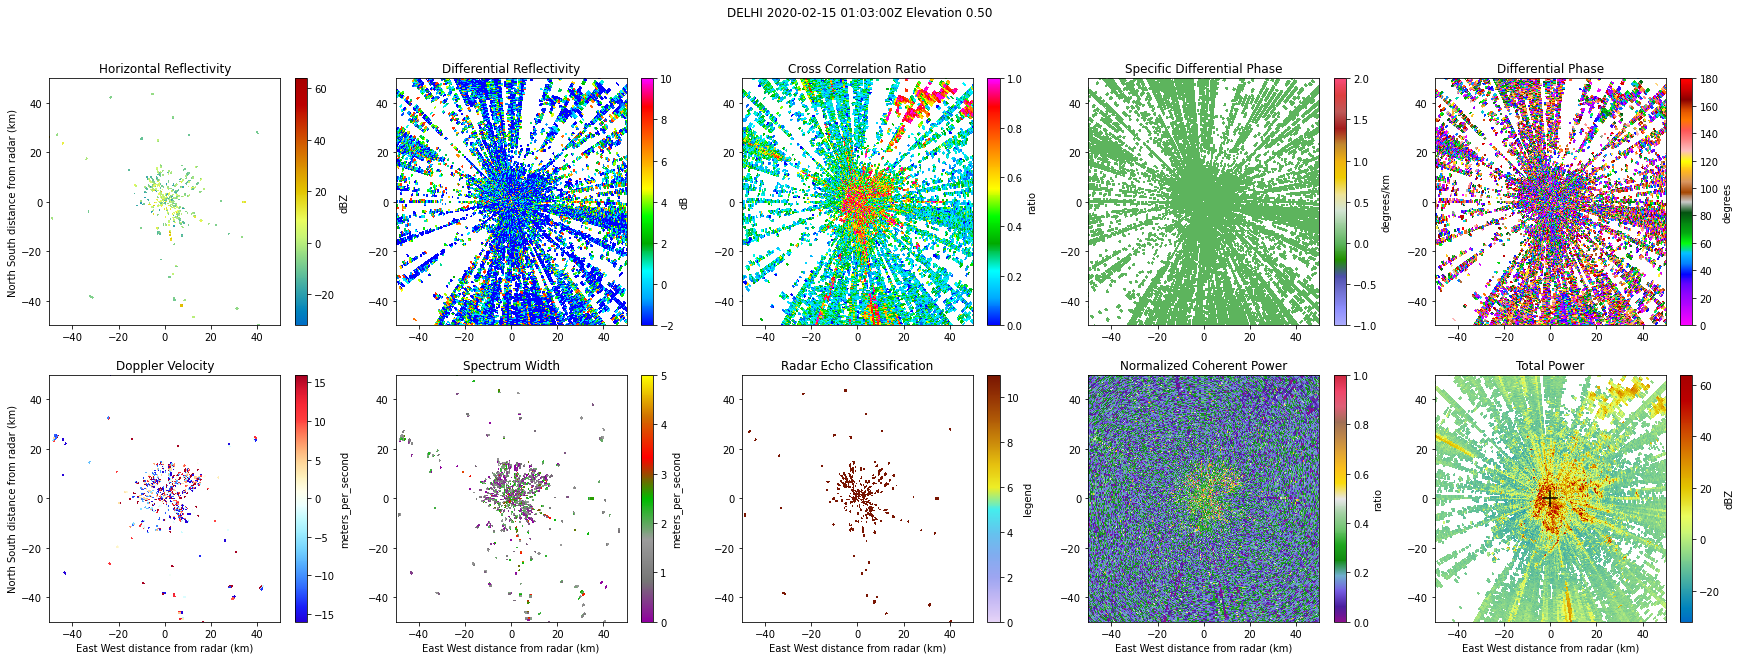

In [201]:
#Read Files and Setup Plotting
fpath = '/Volumes/Neely/PestDAR/Indian_Raw_Radar_Data/DLI200215010229.RAWASHA'
radar=pyart.io.read_sigmet(fpath)
display = pyart.graph.RadarDisplay(radar)

# set the figure title and show
instrument_name = radar.metadata['instrument_name'].decode('utf-8')
time_start = netCDF4.num2date(radar.time['data'][0], radar.time['units'])
time_text = ' ' + time_start.strftime('%Y-%m-%d %H:%M:%SZ')
elevation = radar.fixed_angle['data'][ele]
title = instrument_name + time_text + ' Elevation %.2f' % (elevation)
title

#Plotting Options
ele = 0 #Elevation
R = 50#  #Min and Mac Range from Radar in km

#Figure Options
width=30 #in inches
height=10 #in inches

fig = plt.figure(figsize=(width, height))
nrows=2
ncols=5



ax1 = fig.add_subplot(nrows,ncols,1)
display.plot('reflectivity',ele,ax=ax1, vmin=-32, vmax=16., title='Horizontal Reflectivity', colorbar_label=radar.fields['reflectivity']['units'],
             axislabels=('', 'North South distance from radar (km)'))
display.set_limits((-R, R), (-R, R), ax=ax1)

ax2 = fig.add_subplot(nrows,ncols,2)
display.plot('differential_reflectivity', ele,ax=ax2, vmin=-2, vmax=10., title='Differential Reflectivity', colorbar_label=radar.fields['differential_reflectivity']['units'],
             axislabels=('', ''))
display.set_limits((-R, R), (-R, R), ax=ax2)


ax3 = fig.add_subplot(nrows,ncols,3)
display.plot('cross_correlation_ratio', ele,ax=ax3, vmin=0, vmax=1., title='Cross Correlation Ratio', colorbar_label=radar.fields['cross_correlation_ratio']['units'],
             axislabels=('', ''))
display.set_limits((-R, R), (-R, R), ax=ax3)


ax4 = fig.add_subplot(nrows,ncols,4)
display.plot('specific_differential_phase', ele,ax=ax4, vmin=-1, vmax=2., title='Specific Differential Phase', colorbar_label=radar.fields['specific_differential_phase']['units'],
             axislabels=('', ''))
display.set_limits((-R, R), (-R, R), ax=ax4)


ax5 = fig.add_subplot(nrows,ncols,5)
display.plot('differential_phase', ele,ax=ax5, vmin=0, vmax=180., title='Differential Phase', colorbar_label=radar.fields['differential_phase']['units'],
             axislabels=('', ''))
display.set_limits((-R, R), (-R, R), ax=ax5)



ax6 = fig.add_subplot(nrows,ncols,6)
display.plot('velocity',ele,ax=ax6, vmin=-16, vmax=16., title='Doppler Velocity', colorbar_label=radar.fields['velocity']['units'],
             axislabels=('East West distance from radar (km)', 'North South distance from radar (km)'))
display.set_limits((-R, R), (-R, R), ax=ax6)


ax7 = fig.add_subplot(nrows,ncols,7)
display.plot('spectrum_width', ele, ax=ax7, vmin=0, vmax=5., title='Spectrum Width', colorbar_label=radar.fields['spectrum_width']['units'],
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-R, R), (-R, R), ax=ax7)


ax8 = fig.add_subplot(nrows,ncols,8)
display.plot('radar_echo_classification', ele, ax=ax8, title='Radar Echo Classification', colorbar_label=radar.fields['radar_echo_classification']['units'],
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-R, R), (-R, R), ax=ax8)


ax9 = fig.add_subplot(nrows,ncols,9)
display.plot('normalized_coherent_power', ele, ax=ax9, title='Normalized Coherent Power', colorbar_label=radar.fields['normalized_coherent_power']['units'],
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-R, R), (-R, R), ax=ax9)


ax10 = fig.add_subplot(nrows,ncols,10)
display.plot('total_power', ele,ax=ax10, vmin=-32, vmax=64., title='Total Power', colorbar_label=radar.fields['total_power']['units'],
             axislabels=('East West distance from radar (km)', ''))
display.set_limits((-R, R), (-R, R), ax=ax10)

display.plot_cross_hair(3.)
plt.suptitle(title)
plt.show()



In [102]:
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([28.58975004])}

In [103]:
print(radar.longitude)
print(radar.latitude)

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([77.22195005])}

/Users/rrniii/anaconda3/envs/pestdar/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())
/Users/rrniii/anaconda3/envs/pestdar/lib/python3.7/site-packages/pyart/graph/radarmapdisplay.py:507: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.get_path().vertices.tolist())


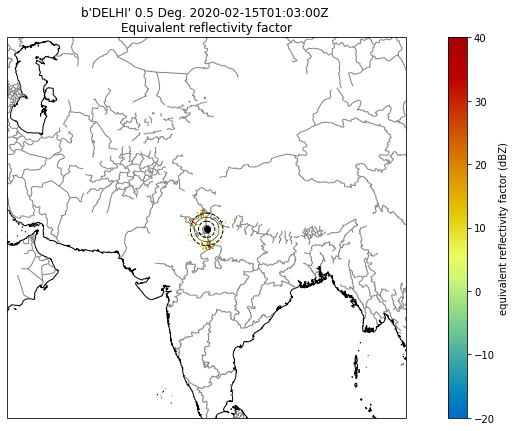

In [109]:
display = pyart.graph.RadarMapDisplay(radar)

fig = plt.figure(figsize=[15, 7])

# Setting projection and ploting the second tilt
projection = ccrs.LambertConformal(central_latitude=radar.latitude['data'][0],
                                   central_longitude=radar.longitude['data'][0])
x=10

display.plot_ppi_map('reflectivity', 0, vmin=-20, vmax=40,
                     min_lon=radar.longitude['data'][0]-2*x, max_lon=radar.longitude['data'][0]+2*x, min_lat=radar.latitude['data'][0]-2*x, max_lat=radar.latitude['data'][0]+2*x,
                     lon_lines=np.arange(-158, -154, .2), resolution='10m',
                     lat_lines=np.arange(69, 72, .1), projection=projection,
                     fig=fig, lat_0=radar.latitude['data'][0],
                     lon_0=radar.longitude['data'][0])

# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(50., line_style='k-',lw=0.5)
display.plot_range_ring(100., line_style='k--',lw=1)
display.plot_range_ring(150., line_style='k-',lw=0.5)
display.plot_range_ring(200., line_style='k--',lw=1)


# Indicate the radar location with a point
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0],'ko')

plt.show()